# Warsztaty badawcze - Projekt 2

## Real Estate Price Analysis - przygotowanie zbioru danych do modeli

### Wiktoria Boguszewska, Mateusz Zacharecki, Patrycja Żak

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Wczytanie danych

In [2]:
df = pd.read_csv("real_estate_ads 3.csv")
df.head()

,id,market,created_at_first,created_at,district_lon,district_lat,title,description,params,price,no_rooms,m,price_per_m,map_lon,map_lat
0,49341,secondary,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,price<=>price<br>price<=>289000<br>price[curre...,289000.0,3,48.000000,6020.83,16.959516,52.391494
1,261720,secondary,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,price<=>price<br>price<=>379000<br>price[curre...,379000.0,3,61.000000,6213.11,16.950743,52.380535
2,50441,secondary,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,price<=>price<br>price<=>339000<br>price[curre...,339000.0,3,63.000000,5380.95,16.945860,52.393188
3,203518,secondary,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,price<=>price<br>price<=>330000<br>price[curre...,330000.0,3,59.200001,5574.32,16.980279,52.391129
4,5,secondary,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,price<=>price<br>price<=>259000<br>price[curre...,259000.0,2,38.000000,6815.79,16.950027,52.395861


### Analiza i obróbka danych (EDA)

In [3]:
df.shape

(13745, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13745 entries, 0 to 13744
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13745 non-null  int64  
 1   market            13745 non-null  object 
 2   created_at_first  13745 non-null  object 
 3   created_at        13745 non-null  object 
 4   district_lon      13558 non-null  float64
 5   district_lat      13558 non-null  float64
 6   title             12818 non-null  object 
 7   description       13745 non-null  object 
 8   params            13745 non-null  object 
 9   price             13745 non-null  float64
 10  no_rooms          13745 non-null  object 
 11  m                 13745 non-null  float64
 12  price_per_m       13745 non-null  float64
 13  map_lon           13745 non-null  float64
 14  map_lat           13745 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.6+ MB


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df['params'][0]

'price<=>price<br>price<=>289000<br>price[currency]<=>PLN<br>m<=>48<br>rooms_num<=>3<br>market<=>secondary<br>building_type<=>block<br>floor_no<=>floor_1<br>building_floors_num<=>4<br>building_material<=><br>windows_type<=>plastic<br>heating<=>urban<br>build_year<=><br>construction_status<=><br>rent<=>price<br>rent<=><br>rent[currency]<=>PLN<br>building_ownership<=>co_operative_ownership_with_a_land_and_mortgage_registe<br>free_from<=><br>media_types<=>cable-television<->internet<->phone<br>security_types<=><br>equipment_types<=><br>extras_types<=>balcony<->separate_kitchen<br>price_per_m<=>6020.83'

In [7]:
def parse_params(params):
    param_dict = {}
    pairs = params.split('<br>')
    for pair in pairs:
        key_value = pair.split('<=>')
        if len(key_value) == 2:
            key, value = key_value
            # Jeśli klucz zawiera się w liście, pomijamy go, bo już jest w danych
            if key in ['m', 'price_per_m', 'price', 'market']:
                continue  # Pomijamy 
            param_dict[key] = value
    return param_dict

In [8]:
parsed_params = df['params'].apply(parse_params)

In [9]:
params_df = pd.DataFrame(parsed_params.tolist())

In [10]:
df = pd.concat([df, params_df], axis=1)

In [11]:
df.shape

(13745, 34)

In [12]:
df.drop('params', axis=1, inplace=True)

In [13]:
# Sprawdzanie, czy występują powtarzające się kolumny
duplicate_columns = df.columns[df.columns.duplicated()]
print(list(duplicate_columns))

[]


In [14]:
df.head()

,id,market,created_at_first,created_at,district_lon,district_lat,title,description,price,no_rooms,m,price_per_m,map_lon,map_lat,price[currency],rooms_num,building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,rent[currency],building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services
0,49341,secondary,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,289000.0,3,48.000000,6020.83,16.959516,52.391494,PLN,3,block,floor_1,4,,plastic,urban,,,,PLN,co_operative_ownership_with_a_land_and_mortgag...,,cable-television<->internet<->phone,,,balcony<->separate_kitchen,NaN
1,261720,secondary,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,379000.0,3,61.000000,6213.11,16.950743,52.380535,PLN,3,block,ground_floor,4,,wooden,urban,,ready_to_use,550,PLN,co_operative_ownership_with_a_land_and_mortgag...,,cable-television<->internet,,,balcony,NaN
2,50441,secondary,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,339000.0,3,63.000000,5380.95,16.945860,52.393188,PLN,3,block,floor_3,4,concrete_plate,,,,,,PLN,co_operative_ownership,,,entryphone,,balcony<->basement,NaN
3,203518,secondary,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,330000.0,3,59.200001,5574.32,16.980279,52.391129,PLN,3,block,floor_1,4,concrete_plate,wooden,urban,1980,ready_to_use,,PLN,co_operative_ownership,,,entryphone,,balcony<->basement,NaN
4,5,secondary,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,259000.0,2,38.000000,6815.79,16.950027,52.395861,PLN,2,block,floor_1,10,concrete_plate,plastic,urban,1980,ready_to_use,,PLN,co_operative_ownership_with_a_land_and_mortgag...,,cable-television<->internet<->phone,entryphone,fridge<->furniture<->stove<->washing_machine,basement,NaN


In [15]:
df['media_types'].unique() # póżniej '0' do usunięcia

array(['cable-television<->internet<->phone',
       'cable-television<->internet', '', 'phone',
       'cable-television<->phone', 'cable-television', '0',
       'internet<->phone', 'internet'], dtype=object)

In [16]:
df['security_types'].unique() # '' i '0' do usunięcia potem

array(['', 'entryphone', '0', 'closed_area<->entryphone', 'monitoring',
       'entryphone<->monitoring', 'anti_burglary_door<->entryphone',
       'anti_burglary_door<->closed_area<->entryphone<->monitoring',
       'anti_burglary_door<->entryphone<->monitoring<->roller_shutters',
       'closed_area<->entryphone<->monitoring',
       'anti_burglary_door<->closed_area<->entryphone<->monitoring<->roller_shutters',
       'alarm<->closed_area<->entryphone<->monitoring',
       'anti_burglary_door<->entryphone<->roller_shutters', 'closed_area',
       'anti_burglary_door<->closed_area<->entryphone<->roller_shutters',
       'anti_burglary_door<->entryphone<->monitoring',
       'alarm<->anti_burglary_door<->entryphone',
       'alarm<->anti_burglary_door<->closed_area<->entryphone<->monitoring<->roller_shutters',
       'alarm<->closed_area<->entryphone', 'anti_burglary_door',
       'entryphone<->roller_shutters',
       'closed_area<->entryphone<->monitoring<->roller_shutters',
       

In [17]:
df['equipment_types'].unique() # '' i '0' do usunięcia potem

array(['', 'fridge<->furniture<->stove<->washing_machine', 'furniture',
       'fridge<->oven<->stove<->washing_machine',
       'dishwasher<->fridge<->furniture<->oven<->stove<->tv<->washing_machine',
       'fridge<->furniture<->oven<->stove<->washing_machine', '0',
       'furniture<->stove', 'fridge<->furniture<->oven<->stove',
       'furniture<->oven<->stove', 'dishwasher<->fridge<->oven<->stove',
       'stove', 'dishwasher<->fridge<->furniture<->oven<->stove',
       'fridge<->furniture<->oven<->stove<->tv<->washing_machine',
       'dishwasher<->fridge<->furniture<->oven<->stove<->washing_machine',
       'dishwasher<->furniture<->oven<->stove<->washing_machine',
       'furniture<->oven<->stove<->washing_machine',
       'dishwasher<->furniture<->oven<->stove',
       'dishwasher<->fridge<->furniture<->stove<->washing_machine',
       'dishwasher<->oven<->stove', 'fridge<->oven<->stove',
       'oven<->stove', 'fridge<->furniture<->oven<->washing_machine',
       'fridge<->fu

In [18]:
df['extras_types'].unique()

array(['balcony<->separate_kitchen', 'balcony', 'balcony<->basement',
       'basement', 'basement<->separate_kitchen', 'balcony<->lift', '',
       'separate_kitchen',
       'balcony<->basement<->garage<->separate_kitchen',
       'lift<->separate_kitchen', 'lift',
       'basement<->lift<->separate_kitchen',
       'balcony<->basement<->separate_kitchen',
       'balcony<->basement<->lift<->separate_kitchen',
       'balcony<->garage<->lift', 'basement<->lift',
       'balcony<->lift<->separate_kitchen', 'balcony<->basement<->lift',
       'garage', 'balcony<->garage<->separate_kitchen',
       'balcony<->garage', 'garden<->lift',
       'air_conditioning<->balcony<->basement<->lift<->terrace',
       'balcony<->basement<->lift<->terrace',
       'balcony<->basement<->terrace',
       'balcony<->basement<->lift<->usable_room',
       'balcony<->basement<->garage', 'garden<->lift<->terrace',
       'balcony<->garage<->lift<->usable_room', 'terrace', '0',
       'balcony<->terrace<->t

In [19]:
df['market'].unique()

array(['secondary', 'primary'], dtype=object)

In [20]:
df = df.loc[df['market'] == 'secondary']

In [21]:
df.drop('market', axis=1, inplace=True)

In [22]:
# Sprawdzimy ile mamy dzielnic
len(df.groupby(['district_lon', 'district_lat']).size().reset_index().rename(columns={0:'count'}))

28

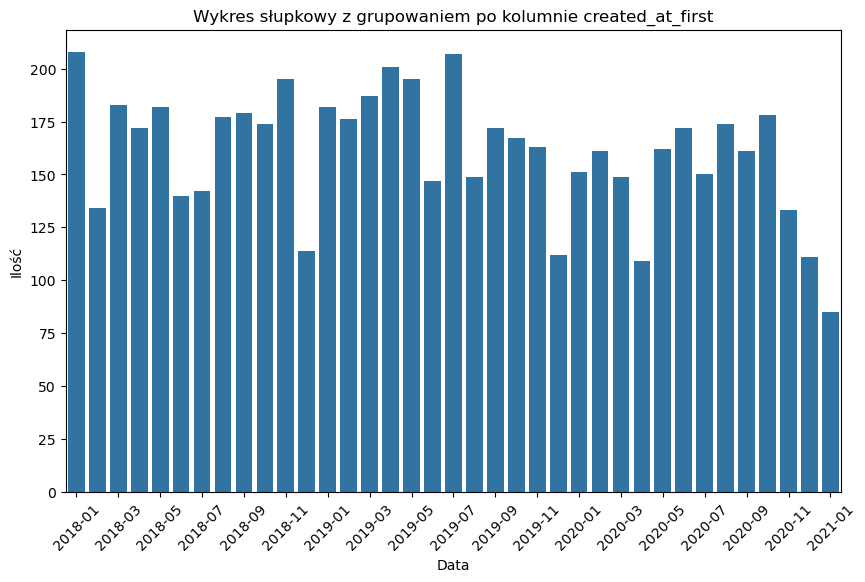

In [23]:
# Grupowanie danych po miesiącach (lub dowolnym okresie)
df_grouped = df.groupby(pd.to_datetime(df['created_at_first']).dt.to_period('M')).size()

# Rysowanie wykresu słupkowego
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_grouped.index.astype(str), y=df_grouped.values)

# Dostosowanie osi X, aby nie pokazywała wszystkich dat
ax.set_xticks(ax.get_xticks()[::2])  # Wyświetlanie co drugiej daty, możesz dostosować np. ::3

# Etykiety osi
plt.xlabel('Data')
plt.ylabel('Ilość')
plt.title('Wykres słupkowy z grupowaniem po kolumnie created_at_first')

# Rotacja etykiet na osi X (opcjonalnie, jeśli etykiety się nie mieszczą)
plt.xticks(rotation=45)

# Wyświetlenie wykresu
plt.show()

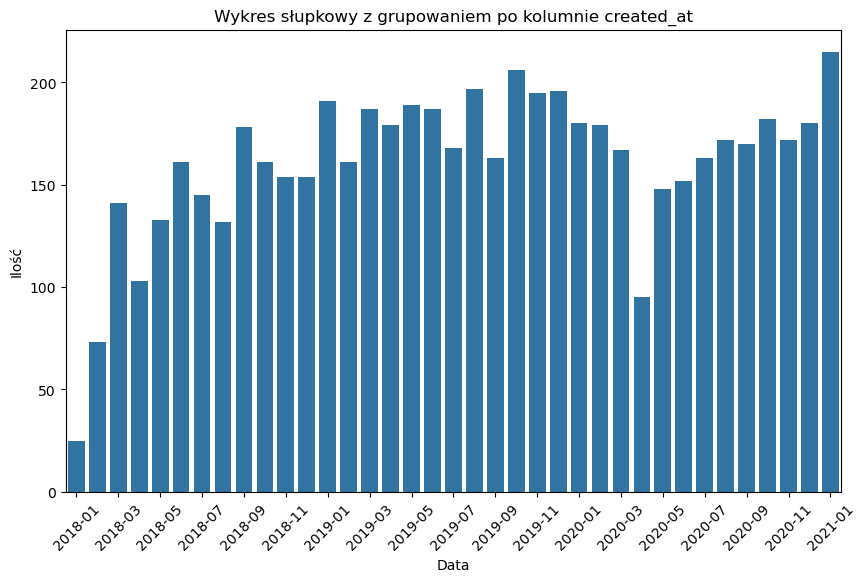

In [24]:
# Grupowanie danych po miesiącach (lub dowolnym okresie)
df_grouped = df.groupby(pd.to_datetime(df['created_at']).dt.to_period('M')).size()

# Rysowanie wykresu słupkowego
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_grouped.index.astype(str), y=df_grouped.values)

# Dostosowanie osi X, aby nie pokazywała wszystkich dat
ax.set_xticks(ax.get_xticks()[::2])  # Wyświetlanie co drugiej daty, możesz dostosować np. ::3

# Etykiety osi
plt.xlabel('Data')
plt.ylabel('Ilość')
plt.title('Wykres słupkowy z grupowaniem po kolumnie created_at')

# Rotacja etykiet na osi X (opcjonalnie, jeśli etykiety się nie mieszczą)
plt.xticks(rotation=45)

# Wyświetlenie wykresu
plt.show()

In [25]:
# Propozycja do budowania modelu regresji liniowej:
# Zmieniamy daty na timestamp, który i tak potem będziemy standaryzowac

In [26]:
df['created_at_first'] = pd.to_datetime(df['created_at_first'])
df['created_at_first_ts'] = df['created_at_first'].apply(lambda x: x.timestamp())
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_ts'] = df['created_at'].apply(lambda x: x.timestamp())

In [27]:
df.head()

,id,created_at_first,created_at,district_lon,district_lat,title,description,price,no_rooms,m,price_per_m,map_lon,map_lat,price[currency],rooms_num,building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,rent[currency],building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services,created_at_first_ts,created_at_ts
0,49341,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,289000.0,3,48.000000,6020.83,16.959516,52.391494,PLN,3,block,floor_1,4,,plastic,urban,,,,PLN,co_operative_ownership_with_a_land_and_mortgag...,,cable-television<->internet<->phone,,,balcony<->separate_kitchen,NaN,1.515071e+09,1.515411e+09
1,261720,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,379000.0,3,61.000000,6213.11,16.950743,52.380535,PLN,3,block,ground_floor,4,,wooden,urban,,ready_to_use,550,PLN,co_operative_ownership_with_a_land_and_mortgag...,,cable-television<->internet,,,balcony,NaN,1.516044e+09,1.516879e+09
2,50441,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,339000.0,3,63.000000,5380.95,16.945860,52.393188,PLN,3,block,floor_3,4,concrete_plate,,,,,,PLN,co_operative_ownership,,,entryphone,,balcony<->basement,NaN,1.515074e+09,1.515650e+09
3,203518,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,330000.0,3,59.200001,5574.32,16.980279,52.391129,PLN,3,block,floor_1,4,concrete_plate,wooden,urban,1980,ready_to_use,,PLN,co_operative_ownership,,,entryphone,,balcony<->basement,NaN,1.515755e+09,1.517323e+09
4,5,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,259000.0,2,38.000000,6815.79,16.950027,52.395861,PLN,2,block,floor_1,10,concrete_plate,plastic,urban,1980,ready_to_use,,PLN,co_operative_ownership_with_a_land_and_mortgag...,,cable-television<->internet<->phone,entryphone,fridge<->furniture<->stove<->washing_machine,basement,NaN,1.514893e+09,1.516285e+09


In [28]:
df['rent[currency]'].unique()

array(['PLN', ''], dtype=object)

In [29]:
print(df['rent[currency]'].value_counts())

PLN    5556
        398
Name: rent[currency], dtype: int64


In [30]:
df.drop('rent[currency]', axis=1, inplace=True)

In [31]:
df['remote_services'].unique()

array([nan, '', '1'], dtype=object)

In [32]:
# '' to niekoniecznie nan

In [33]:
df['m'].sort_values(ascending=False)

5130     267000.000000
7248        193.589996
3284        165.529999
74          160.000000
1076        160.000000
             ...      
5009         19.000000
10942        19.000000
5151         19.000000
4145         18.540001
353          15.200000
Name: m, Length: 5954, dtype: float64

In [34]:
df.loc[5130]

id                                                               7691341
created_at_first                                     2019-07-30 00:50:31
created_at                                           2019-07-30 18:11:41
district_lon                                                     16.9408
district_lat                                                    52.38356
title                              Rataje, 2 piętro, niski blok, balkon.
description            <p><br/>Mieszkanie do własnej aranżacji - remo...
price                                                           267000.0
no_rooms                                                               3
m                                                               267000.0
price_per_m                                                          1.0
map_lon                                                        16.959209
map_lat                                                        52.391428
price[currency]                                    

In [35]:
# Z tym rekordem jest coś nie tak

In [36]:
df.drop(index=5130, inplace=True)

In [37]:
df.reset_index(drop = True, inplace=True)

In [38]:
df['price_per_m'].sort_values(ascending=False)

384     20000.00
65      20000.00
1121    20000.00
5828    18589.74
3833    15847.46
          ...   
2202     1800.00
3518     1755.56
902      1750.00
3236     1717.17
916       525.09
Name: price_per_m, Length: 5953, dtype: float64

In [39]:
df.reset_index(drop = True, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5953 non-null   int64         
 1   created_at_first     5953 non-null   datetime64[ns]
 2   created_at           5953 non-null   datetime64[ns]
 3   district_lon         5889 non-null   float64       
 4   district_lat         5889 non-null   float64       
 5   title                5188 non-null   object        
 6   description          5953 non-null   object        
 7   price                5953 non-null   float64       
 8   no_rooms             5953 non-null   object        
 9   m                    5953 non-null   float64       
 10  price_per_m          5953 non-null   float64       
 11  map_lon              5953 non-null   float64       
 12  map_lat              5953 non-null   float64       
 13  price[currency]      5953 non-nul

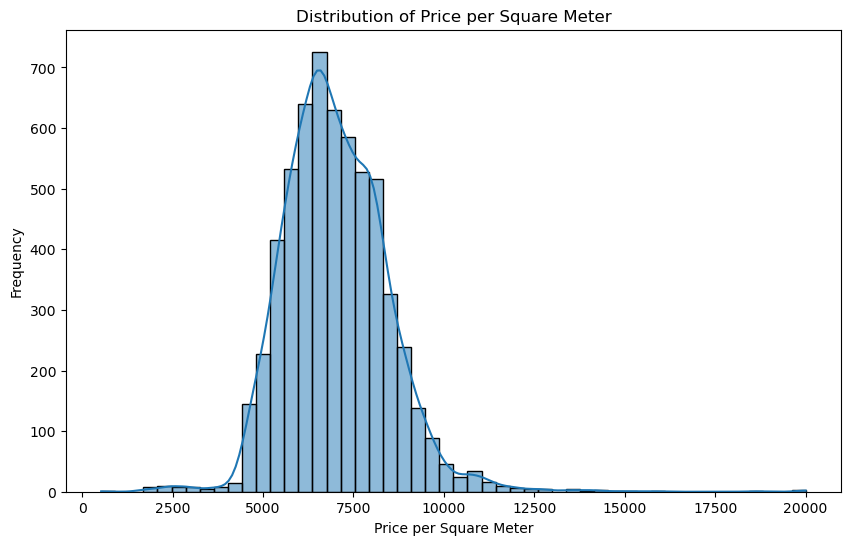

In [41]:
# Rozkład cen
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_m'], bins=50, kde=True)
plt.title('Distribution of Price per Square Meter')
plt.xlabel('Price per Square Meter')
plt.ylabel('Frequency')
plt.show()

In [42]:
def one_hot_media_types(df, col):
    df[col] = df[col].str.split('<->')

    all_types = set([i for sublist in df[col].dropna() for i in sublist if i])

    for j in all_types:
        df[f'{col}_{j}'] = df[col].apply(lambda x: 1 if j in (x if x else []) else 0)

    return df

In [43]:
df = one_hot_media_types(df, 'media_types')

In [44]:
df = one_hot_media_types(df, 'equipment_types')

In [45]:
df = one_hot_media_types(df, 'extras_types')

In [46]:
df = one_hot_media_types(df, 'security_types')

In [47]:
kolumny_kat = ['building_material', 'windows_type', 'heating', 'construction_status', 'building_ownership', 'building_type']

In [48]:
for k in kolumny_kat:
    print(df[k].unique())

['' 'concrete_plate' 'breezeblock' 'brick' 'concrete' 'silikat' 'other'
 'cellular_concrete' 'reinforced_concrete' 'hydroton']
['plastic' 'wooden' '' 'aluminium']
['urban' '' 'other' 'boiler_room' 'electrical' 'gas' 'tiled_stove']
['' 'ready_to_use' 'to_renovation' 'to_completion']
['co_operative_ownership_with_a_land_and_mortgage_registe'
 'co_operative_ownership' 'full_ownership' '' 'share']
['block' '' 'apartment' 'ribbon' 'house' 'tenement']


In [49]:
df = pd.concat([df, pd.get_dummies(df[kolumny_kat], drop_first=False)], axis=1)

In [50]:
# df.drop(['media_types', 'equipment_types', 'extras_types', 'security_types', 'building_material', 'windows_type', 'heating', 'construction_status', 'building_ownership', 'building_type'], axis=1, inplace=True)

In [51]:
for k in kolumny_kat:
    pattern = f"{k}_"
    
    columns_to_drop = [col for col in df.columns if col == pattern]
    df.drop(columns=columns_to_drop, inplace=True)

    print(f"Usunięto kolumny: {columns_to_drop}")

Usunięto kolumny: ['building_material_']
Usunięto kolumny: ['windows_type_']
Usunięto kolumny: ['heating_']
Usunięto kolumny: ['construction_status_']
Usunięto kolumny: ['building_ownership_']
Usunięto kolumny: ['building_type_']


In [52]:
# Sprawdzanie, czy występują powtarzające się kolumny
duplicate_columns = df.columns[df.columns.duplicated()]
print(list(duplicate_columns))

[]


In [53]:
df[[col for col in df.columns if col.startswith('media_types')]]

,media_types,media_types_phone,media_types_cable-television,media_types_0,media_types_internet
0,"[cable-television, internet, phone]",1,1,0,1
1,"[cable-television, internet]",0,1,0,1
2,[],0,0,0,0
3,[],0,0,0,0
4,"[cable-television, internet, phone]",1,1,0,1
...,...,...,...,...,...
5948,[0],0,0,1,0
5949,[0],0,0,1,0
5950,"[cable-television, internet]",0,1,0,1
5951,"[cable-television, internet]",0,1,0,1


In [54]:
drop_cols = []
drop_cols.append('media_types_0')

In [55]:
df[[col for col in df.columns if col.startswith('equipment_types')]]

,equipment_types,equipment_types_fridge,equipment_types_0,equipment_types_stove,equipment_types_washing_machine,equipment_types_oven,equipment_types_dishwasher,equipment_types_furniture,equipment_types_tv
0,[],0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0
2,[],0,0,0,0,0,0,0,0
3,[],0,0,0,0,0,0,0,0
4,"[fridge, furniture, stove, washing_machine]",1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5948,[0],0,1,0,0,0,0,0,0
5949,[0],0,1,0,0,0,0,0,0
5950,[],0,0,0,0,0,0,0,0
5951,[0],0,1,0,0,0,0,0,0


In [56]:
drop_cols.append('equipment_types_0')

In [57]:
df[[col for col in df.columns if col.startswith('extras_types')]]

,extras_types,extras_types_basement,extras_types_balcony,extras_types_0,extras_types_terrace,extras_types_garden,extras_types_two_storey,extras_types_garage,extras_types_air_conditioning,extras_types_usable_room,extras_types_separate_kitchen,extras_types_lift
0,"[balcony, separate_kitchen]",0,1,0,0,0,0,0,0,0,1,0
1,[balcony],0,1,0,0,0,0,0,0,0,0,0
2,"[balcony, basement]",1,1,0,0,0,0,0,0,0,0,0
3,"[balcony, basement]",1,1,0,0,0,0,0,0,0,0,0
4,[basement],1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5948,"[basement, separate_kitchen]",1,0,0,0,0,0,0,0,0,1,0
5949,"[balcony, lift]",0,1,0,0,0,0,0,0,0,0,1
5950,"[balcony, basement, lift]",1,1,0,0,0,0,0,0,0,0,1
5951,"[basement, lift]",1,0,0,0,0,0,0,0,0,0,1


In [58]:
drop_cols.append('extras_types_0')

In [59]:
df[[col for col in df.columns if col.startswith('security_types')]]

,security_types,security_types_0,security_types_alarm,security_types_roller_shutters,security_types_monitoring,security_types_closed_area,security_types_anti_burglary_door,security_types_entryphone
0,[],0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0
2,[entryphone],0,0,0,0,0,0,1
3,[entryphone],0,0,0,0,0,0,1
4,[entryphone],0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
5948,[0],1,0,0,0,0,0,0
5949,[entryphone],0,0,0,0,0,0,1
5950,[],0,0,0,0,0,0,0
5951,[0],1,0,0,0,0,0,0


In [60]:
drop_cols.append('security_types_0')

In [61]:
drop_cols

['media_types_0', 'equipment_types_0', 'extras_types_0', 'security_types_0']

In [62]:
df.drop(drop_cols, axis=1, inplace=True)

In [63]:
df['no_rooms'].unique()

array(['3', '2', '4', '1', '5', '7', 'more', '6'], dtype=object)

In [64]:
print(df['no_rooms'].value_counts())

2       2621
3       2309
1        560
4        412
5         36
6         12
7          2
more       1
Name: no_rooms, dtype: int64


In [65]:
df.drop('price', axis=1, inplace=True) # bo to informacja zawarta w y

In [66]:
df['floor_no'].unique()

array(['floor_1', 'ground_floor', 'floor_3', 'floor_4', 'floor_2',
       'floor_5', 'floor_higher_10', 'floor_10', 'floor_6', '', 'floor_7',
       'floor_8', 'floor_9', 'cellar'], dtype=object)

In [67]:
print(df['floor_no'].value_counts())

floor_4            998
floor_1            857
floor_3            851
floor_2            741
ground_floor       591
floor_higher_10    376
floor_9            290
floor_5            273
floor_10           250
floor_8            216
floor_6            200
floor_7            197
                   112
cellar               1
Name: floor_no, dtype: int64


In [68]:
mapping = {
    'cellar': -1,
    'ground_floor': 0,
    'floor_1': 1,
    'floor_2': 2,
    'floor_3': 3,
    'floor_4': 4,
    'floor_5': 5,
    'floor_6': 6,
    'floor_7': 7,
    'floor_8': 8,
    'floor_9': 9,
    'floor_10': 10,
    'floor_higher_10': 11
}

In [69]:
df['floor_no_numeric'] = df['floor_no'].replace(mapping)

In [70]:
df['building_floors_num'].unique()

array(['4', '10', '5', '3', '16', '18', '', '11', '6', '8', '2', '1',
       '13', '12', '7', '14', '9', '15', '17', '110', '20', '19'],
      dtype=object)

In [71]:
print(df['building_floors_num'].value_counts())

4      2212
10     1177
16      626
5       401
11      396
3       378
        300
12       96
6        83
2        55
18       53
8        45
17       25
15       24
9        22
7        22
1        21
13        6
20        5
19        3
14        2
110       1
Name: building_floors_num, dtype: int64


In [72]:
df['building_floors_num'] = df['building_floors_num'].replace('', np.nan)

In [73]:
df['building_floors_num'] = pd.to_numeric(df['building_floors_num'], errors='coerce')

In [74]:
print(df['building_floors_num'].dtypes)

float64


In [75]:
print(df['building_floors_num'].value_counts(dropna=False))

4.0      2212
10.0     1177
16.0      626
5.0       401
11.0      396
3.0       378
NaN       300
12.0       96
6.0        83
2.0        55
18.0       53
8.0        45
17.0       25
15.0       24
9.0        22
7.0        22
1.0        21
13.0        6
20.0        5
19.0        3
14.0        2
110.0       1
Name: building_floors_num, dtype: int64


In [76]:
df[df['building_floors_num']==110]

,id,created_at_first,created_at,district_lon,district_lat,title,description,no_rooms,m,price_per_m,map_lon,map_lat,price[currency],rooms_num,building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services,created_at_first_ts,created_at_ts,media_types_phone,media_types_cable-television,media_types_internet,equipment_types_fridge,equipment_types_stove,equipment_types_washing_machine,equipment_types_oven,equipment_types_dishwasher,equipment_types_furniture,equipment_types_tv,extras_types_basement,extras_types_balcony,extras_types_terrace,extras_types_garden,extras_types_two_storey,extras_types_garage,extras_types_air_conditioning,extras_types_usable_room,extras_types_separate_kitchen,extras_types_lift,security_types_alarm,security_types_roller_shutters,security_types_monitoring,security_types_closed_area,security_types_anti_burglary_door,security_types_entryphone,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,windows_type_aluminium,windows_type_plastic,windows_type_wooden,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_type_apartment,building_type_block,building_type_house,building_type_ribbon,building_type_tenement,floor_no_numeric
1217,3438017,2018-08-14 10:55:51,2018-08-16 10:55:39,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,2,52.0,6442.31,16.9408,52.38356,PLN,2,block,floor_higher_10,110.0,concrete_plate,plastic,urban,1980,to_renovation,,co_operative_ownership,,"[cable-television, internet, phone]",[],[],"[balcony, lift, separate_kitchen]",NaN,1.534244e+09,1.534417e+09,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,11


In [77]:
# prawdopodobnie numer piętra 11, bo ma być większe niż 10
# największy blok mieszkalny w Poznaniu ma 21 pięter, ale w modelu to nie bedzie miec takiego wplywu

In [78]:
df.loc[1217, 'building_floors_num'] = 11

In [79]:
# Sprawdzmy czy nie zostały jakieś kolumny o różnej nazwie, a dokładnie tej samej zawartości

similar_columns = []

for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:  
            if df[col1].equals(df[col2]):
                similar_columns.append((col1, col2))

if similar_columns:
    print("Kolumny o tej samej zawartości, ale różnych nazwach:")
    for col_pair in similar_columns:
        print(f"{col_pair[0]} i {col_pair[1]}")
else:
    print("Brak kolumn o tej samej zawartości.")


Kolumny o tej samej zawartości, ale różnych nazwach:
no_rooms i rooms_num


In [80]:
df.drop('rooms_num', axis=1, inplace=True)

In [81]:
df['no_rooms'] = pd.to_numeric(df['no_rooms'], errors='coerce')

In [82]:
df.head()

,id,created_at_first,created_at,district_lon,district_lat,title,description,no_rooms,m,price_per_m,map_lon,map_lat,price[currency],building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services,created_at_first_ts,created_at_ts,media_types_phone,media_types_cable-television,media_types_internet,equipment_types_fridge,equipment_types_stove,equipment_types_washing_machine,equipment_types_oven,equipment_types_dishwasher,equipment_types_furniture,equipment_types_tv,extras_types_basement,extras_types_balcony,extras_types_terrace,extras_types_garden,extras_types_two_storey,extras_types_garage,extras_types_air_conditioning,extras_types_usable_room,extras_types_separate_kitchen,extras_types_lift,security_types_alarm,security_types_roller_shutters,security_types_monitoring,security_types_closed_area,security_types_anti_burglary_door,security_types_entryphone,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,windows_type_aluminium,windows_type_plastic,windows_type_wooden,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_type_apartment,building_type_block,building_type_house,building_type_ribbon,building_type_tenement,floor_no_numeric
0,49341,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,3.0,48.000000,6020.83,16.959516,52.391494,PLN,block,floor_1,4.0,,plastic,urban,,,,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet, phone]",[],[],"[balcony, separate_kitchen]",NaN,1.515071e+09,1.515411e+09,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,261720,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,3.0,61.000000,6213.11,16.950743,52.380535,PLN,block,ground_floor,4.0,,wooden,urban,,ready_to_use,550,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet]",[],[],[balcony],NaN,1.516044e+09,1.516879e+09,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
2,50441,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,3.0,63.000000,5380.95,16.945860,52.393188,PLN,block,floor_3,4.0,concrete_plate,,,,,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1.515074e+09,1.515650e+09,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3
3,203518,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,3.0,59.200001,5574.32,16.980279,52.391129,PLN,block,floor_1,4.0,concrete_plate,wooden,urban,1980,ready_to_use,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1.515755e+09,1.517323e+09,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,5,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,2.0,38.000000,6815.79,16.950027,52.395861,PLN,block,floor_1,10.0,concrete_plate,plastic,urban,1980,ready_to_use,,co_operative_owne

In [83]:
df.isna().sum()[df.isna().sum()>0]

district_lon             64
district_lat             64
title                   765
no_rooms                  1
building_floors_num     300
remote_services        4631
dtype: int64

In [84]:
df.select_dtypes(include=['object']).columns

Index(['title', 'description', 'price[currency]', 'building_type', 'floor_no',
       'building_material', 'windows_type', 'heating', 'build_year',
       'construction_status', 'rent', 'building_ownership', 'free_from',
       'media_types', 'security_types', 'equipment_types', 'extras_types',
       'remote_services', 'floor_no_numeric'],
      dtype='object')

In [85]:
df.select_dtypes(include=[np.number]).columns

Index(['id', 'district_lon', 'district_lat', 'no_rooms', 'm', 'price_per_m',
       'map_lon', 'map_lat', 'building_floors_num', 'created_at_first_ts',
       'created_at_ts', 'media_types_phone', 'media_types_cable-television',
       'media_types_internet', 'equipment_types_fridge',
       'equipment_types_stove', 'equipment_types_washing_machine',
       'equipment_types_oven', 'equipment_types_dishwasher',
       'equipment_types_furniture', 'equipment_types_tv',
       'extras_types_basement', 'extras_types_balcony', 'extras_types_terrace',
       'extras_types_garden', 'extras_types_two_storey', 'extras_types_garage',
       'extras_types_air_conditioning', 'extras_types_usable_room',
       'extras_types_separate_kitchen', 'extras_types_lift',
       'security_types_alarm', 'security_types_roller_shutters',
       'security_types_monitoring', 'security_types_closed_area',
       'security_types_anti_burglary_door', 'security_types_entryphone',
       'building_material_breezeblo

In [86]:
df.drop('id', axis=1, inplace=True)

In [87]:
df.head()

,created_at_first,created_at,district_lon,district_lat,title,description,no_rooms,m,price_per_m,map_lon,map_lat,price[currency],building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services,created_at_first_ts,created_at_ts,media_types_phone,media_types_cable-television,media_types_internet,equipment_types_fridge,equipment_types_stove,equipment_types_washing_machine,equipment_types_oven,equipment_types_dishwasher,equipment_types_furniture,equipment_types_tv,extras_types_basement,extras_types_balcony,extras_types_terrace,extras_types_garden,extras_types_two_storey,extras_types_garage,extras_types_air_conditioning,extras_types_usable_room,extras_types_separate_kitchen,extras_types_lift,security_types_alarm,security_types_roller_shutters,security_types_monitoring,security_types_closed_area,security_types_anti_burglary_door,security_types_entryphone,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,windows_type_aluminium,windows_type_plastic,windows_type_wooden,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_type_apartment,building_type_block,building_type_house,building_type_ribbon,building_type_tenement,floor_no_numeric
0,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,3.0,48.000000,6020.83,16.959516,52.391494,PLN,block,floor_1,4.0,,plastic,urban,,,,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet, phone]",[],[],"[balcony, separate_kitchen]",NaN,1.515071e+09,1.515411e+09,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,3.0,61.000000,6213.11,16.950743,52.380535,PLN,block,ground_floor,4.0,,wooden,urban,,ready_to_use,550,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet]",[],[],[balcony],NaN,1.516044e+09,1.516879e+09,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
2,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,3.0,63.000000,5380.95,16.945860,52.393188,PLN,block,floor_3,4.0,concrete_plate,,,,,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1.515074e+09,1.515650e+09,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3
3,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,3.0,59.200001,5574.32,16.980279,52.391129,PLN,block,floor_1,4.0,concrete_plate,wooden,urban,1980,ready_to_use,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1.515755e+09,1.517323e+09,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,2.0,38.000000,6815.79,16.950027,52.395861,PLN,block,floor_1,10.0,concrete_plate,plastic,urban,1980,ready_to_use,,co_operative_ownership_with_a_land_and_mortgag..

In [88]:
df['price[currency]'].unique()

array(['PLN'], dtype=object)

In [89]:
df.drop('price[currency]', axis=1, inplace=True)

In [90]:
binary_cols = df.apply(lambda col: set(col.dropna().unique()).issubset({0, 1}) if col.apply(lambda x: isinstance(x, (int, float))).all() else False)
binary_columns = binary_cols[binary_cols].index.tolist()

In [91]:
binary_columns

['media_types_phone',
 'media_types_cable-television',
 'media_types_internet',
 'equipment_types_fridge',
 'equipment_types_stove',
 'equipment_types_washing_machine',
 'equipment_types_oven',
 'equipment_types_dishwasher',
 'equipment_types_furniture',
 'equipment_types_tv',
 'extras_types_basement',
 'extras_types_balcony',
 'extras_types_terrace',
 'extras_types_garden',
 'extras_types_two_storey',
 'extras_types_garage',
 'extras_types_air_conditioning',
 'extras_types_usable_room',
 'extras_types_separate_kitchen',
 'extras_types_lift',
 'security_types_alarm',
 'security_types_roller_shutters',
 'security_types_monitoring',
 'security_types_closed_area',
 'security_types_anti_burglary_door',
 'security_types_entryphone',
 'building_material_breezeblock',
 'building_material_brick',
 'building_material_cellular_concrete',
 'building_material_concrete',
 'building_material_concrete_plate',
 'building_material_hydroton',
 'building_material_other',
 'building_material_reinforced_co

In [92]:
# Zmieniamy z danych numerycznych, na obiektowe
# df[binary_columns] = df[binary_columns].astype(object)
# Nie musimy, bo te dane sa w calosci uzupelnione, wiec nie beda braki wypelniane srednia

In [93]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df_num = df[numerical_columns]

In [94]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_cat = df[categorical_columns]

In [95]:
datetime_columns = df.select_dtypes(include=['datetime']).columns
df_date = df[datetime_columns]

In [96]:
print(df_num.shape[1])
print(df_cat.shape[1])
print(df_date.shape[1])
print(df_num.shape[1] + df_cat.shape[1] + df_date.shape[1] == df.shape[1])

66
18
2
True


In [97]:
df_cat

,title,description,building_type,floor_no,building_material,windows_type,heating,build_year,construction_status,rent,building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services,floor_no_numeric
0,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,block,floor_1,,plastic,urban,,,,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet, phone]",[],[],"[balcony, separate_kitchen]",NaN,1
1,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,block,ground_floor,,wooden,urban,,ready_to_use,550,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet]",[],[],[balcony],NaN,0
2,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,block,floor_3,concrete_plate,,,,,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,3
3,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,block,floor_1,concrete_plate,wooden,urban,1980,ready_to_use,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1
4,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,block,floor_1,concrete_plate,plastic,urban,1980,ready_to_use,,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet, phone]",[entryphone],"[fridge, furniture, stove, washing_machine]",[basement],NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,REZERWACJA * 2 pokoje * blisko Politechnika i AWF,<p>***Rezerwacja do 30.04.2021***</p>\r\n<p></...,block,floor_3,,plastic,urban,,to_renovation,215,co_operative_ownership_with_a_land_and_mortgag...,,[0],[0],[0],"[basement, separate_kitchen]",1,3
5949,Przestronna kawalerka z miejscem w hali garażowej,<p>REZERWACJA</p>\r\n<p>Na sprzedaż mieszkanie...,block,floor_3,,,urban,2011,,,full_ownership,,[0],[entryphone],[0],"[balcony, lift]",,3
5950,*Gotowe do zamieszkania | 3 pokoje - duża loggia,<p>25 lata doświadczenia w branży nieruchomośc...,block,floor_6,,plastic,urban,,ready_to_use,600,co_operative_ownership,,"[cable-television, internet]",[],[],"[balcony, basement, lift]",,6
5951,2 pokoje na Ratajach,<p>Zapraszam do zapoznania się z ofertą 2 - po...,,floor_4,concrete_plate,wooden,urban,,ready_to_use,360,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet]",[0],[0],"[basement, lift]",1,4


In [98]:
df_cat.isna().sum()

title                   765
description               0
building_type             0
floor_no                  0
building_material         0
windows_type              0
heating                   0
build_year                0
construction_status       0
rent                      0
building_ownership        0
free_from                 0
media_types               0
security_types            0
equipment_types           0
extras_types              0
remote_services        4631
floor_no_numeric          0
dtype: int64

In [99]:
nan_counts = df_cat.isna().sum()
nan_counts[nan_counts > 0]

title               765
remote_services    4631
dtype: int64

In [100]:
df_cat.groupby('remote_services').size().reset_index().rename(columns={0:'count'})

,remote_services,count
0,,1181
1,1,141


In [101]:
# Dla '' w remote_services damy 0
df_cat.loc[:, 'remote_services'] = df_cat['remote_services'].replace('', '0')

/tmp/ipykernel_30329/2606512973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.loc[:, 'remote_services'] = df_cat['remote_services'].replace('', '0')


In [102]:
df_cat.groupby('remote_services').size().reset_index().rename(columns={0:'count'})

,remote_services,count
0,0,1181
1,1,141


In [103]:
(df_cat == '').sum()

title                     0
description               0
building_type           986
floor_no                112
building_material      3074
windows_type           1702
heating                1606
build_year             2984
construction_status    2271
rent                   2579
building_ownership     1538
free_from              4878
media_types               0
security_types            0
equipment_types           0
extras_types              0
remote_services           0
floor_no_numeric        112
dtype: int64

In [104]:
df_cat.groupby('building_type').size().reset_index().rename(columns={0:'count'}) #'' to nan tutaj

,building_type,count
0,,986
1,apartment,456
2,block,4466
3,house,10
4,ribbon,21
5,tenement,14


In [105]:
# Analogicznie można dla reszty kolumn, ale wiemy, że tam nie ma nan, więc puste stringi muszą oznaczać nan.

In [106]:
# Dla '' damy nan
df_cat = df_cat.replace('', np.nan)

In [107]:
(df_cat == '').sum()

title                  0
description            0
building_type          0
floor_no               0
building_material      0
windows_type           0
heating                0
build_year             0
construction_status    0
rent                   0
building_ownership     0
free_from              0
media_types            0
security_types         0
equipment_types        0
extras_types           0
remote_services        0
floor_no_numeric       0
dtype: int64

In [108]:
# Teraz dane numeryczne

In [109]:
df_num.isna().sum()

district_lon               64
district_lat               64
no_rooms                    1
m                           0
price_per_m                 0
                           ..
building_type_apartment     0
building_type_block         0
building_type_house         0
building_type_ribbon        0
building_type_tenement      0
Length: 66, dtype: int64

In [110]:
perc_cat = df_cat.isna().mean() * 100
perc_cat[perc_cat > 0].sort_values(ascending=False)

free_from              81.941878
remote_services        77.792710
building_material      51.637830
build_year             50.125987
rent                   43.322694
construction_status    38.148833
windows_type           28.590627
heating                26.977994
building_ownership     25.835713
building_type          16.563077
title                  12.850664
floor_no                1.881404
floor_no_numeric        1.881404
dtype: float64

In [111]:
df_cat.groupby('free_from').size().reset_index().rename(columns={0:'count'}) 

,free_from,count
0,1980-01-01,3
1,2016-07-01,5
2,2017-08-31,2
3,2017-11-04,4
4,2017-12-17,2
...,...,...
514,2021-07-01,2
515,2021-09-13,1
516,2021-09-30,1
517,2021-12-25,1


In [112]:
df_cat['free_from'] = pd.to_datetime(df_cat['free_from'])
df_cat['free_from_year'] = df_cat['free_from'].apply(lambda x: x.year).astype(object)

In [113]:
# df_cat.drop('free_from', axis=1, inplace=True)

In [114]:
df_cat.groupby('free_from_year').size().reset_index().rename(columns={0:'count'}) 

,free_from_year,count
0,1980.0,3
1,2016.0,5
2,2017.0,8
3,2018.0,393
4,2019.0,429
5,2020.0,214
6,2021.0,21
7,2022.0,2


In [115]:
# Za dużo braków danych i tylko 8 roznych lat, żeby uzupelniac braki danych

In [116]:
df_cat.groupby('rent').size().reset_index().rename(columns={0:'count'}) 

,rent,count
0,1,2
1,100,1
2,1000,15
3,1100,5
4,1148,5
...,...,...
295,930,1
296,932,1
297,950,8
298,970,2


In [117]:
# Też do usunięcia

In [118]:
df_cat.groupby('remote_services').size().reset_index().rename(columns={0:'count'}) 

,remote_services,count
0,0,1181
1,1,141


In [119]:
# Zostawmy. Częściej jest 0, a dzięki 1 można znaleźć bardziej 'ekskluzywne' obiekty.

In [120]:
# df_cat.drop(['free_from_year', 'rent'], axis=1, inplace=True)

In [121]:
df_date.isna().sum()

created_at_first    0
created_at          0
dtype: int64

In [122]:
df_notimputed = pd.merge(df_num, df_cat, left_index=True, right_index=True)
df_notimputed = pd.merge(df_notimputed, df_date, left_index=True, right_index=True)
df_notimputed.to_csv('real_estate_not_imputed.csv', index=False)

In [304]:
# Uzupełniamy braki danych

In [305]:
df.head()

,created_at_first,created_at,district_lon,district_lat,title,description,no_rooms,m,price_per_m,map_lon,map_lat,building_type,floor_no,building_floors_num,building_material,windows_type,heating,build_year,construction_status,rent,building_ownership,free_from,media_types,security_types,equipment_types,extras_types,remote_services,created_at_first_ts,created_at_ts,media_types_internet,media_types_cable-television,media_types_phone,equipment_types_furniture,equipment_types_tv,equipment_types_stove,equipment_types_washing_machine,equipment_types_dishwasher,equipment_types_oven,equipment_types_fridge,extras_types_balcony,extras_types_air_conditioning,extras_types_lift,extras_types_garage,extras_types_basement,extras_types_separate_kitchen,extras_types_two_storey,extras_types_garden,extras_types_terrace,extras_types_usable_room,security_types_roller_shutters,security_types_monitoring,security_types_closed_area,security_types_alarm,security_types_entryphone,security_types_anti_burglary_door,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,windows_type_aluminium,windows_type_plastic,windows_type_wooden,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_type_apartment,building_type_block,building_type_house,building_type_ribbon,building_type_tenement,floor_no_numeric
0,2018-01-04 13:11:05,2018-01-08 11:27:35,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,3.0,48.000000,6020.83,16.959516,52.391494,block,floor_1,4.0,,plastic,urban,,,,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet, phone]",[],[],"[balcony, separate_kitchen]",NaN,1.515071e+09,1.515411e+09,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,2018-01-15 19:12:07,2018-01-25 11:11:31,16.9408,52.38356,NaN,<p>Zapraszam do zapoznania się z ofertą sprzed...,3.0,61.000000,6213.11,16.950743,52.380535,block,ground_floor,4.0,,wooden,urban,,ready_to_use,550,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet]",[],[],[balcony],NaN,1.516044e+09,1.516879e+09,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
2,2018-01-04 13:53:29,2018-01-11 05:55:12,16.9408,52.38356,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,3.0,63.000000,5380.95,16.945860,52.393188,block,floor_3,4.0,concrete_plate,,,,,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1.515074e+09,1.515650e+09,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3
3,2018-01-12 11:10:57,2018-01-30 14:38:39,16.9408,52.38356,"Mieszkanie 3 pokojowe blisko tramwaju, Poznań os.",<p>Oferuję na sprzedaż jasne i zadbane mieszka...,3.0,59.200001,5574.32,16.980279,52.391129,block,floor_1,4.0,concrete_plate,wooden,urban,1980,ready_to_use,,co_operative_ownership,,[],[entryphone],[],"[balcony, basement]",NaN,1.515755e+09,1.517323e+09,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,2018-01-02 11:34:51,2018-01-18 14:22:29,16.9408,52.38356,"Inwestycja -rondo Rataje student AWF,POLITECHNIKA",<p><strong>Dwa pokoje na niskim piętrze tuż pr...,2.0,38.000000,6815.79,16.950027,52.395861,block,floor_1,10.0,concrete_plate,plastic,urban,1980,ready_to_use,,co_operative_ownership_with_a_land_and_mortgag...,,"[cable-television, internet, pho

In [306]:
# Dla danych związanych z czasem nie musimy

In [307]:
# Tylko dla danych typu hashable
hashable_columns = [col for col in df_cat.columns if df_cat[col].apply(lambda x: isinstance(x, (str, int, float, bool))).all()]

df_cat_hashable = df_cat[hashable_columns]
df_cat_unhashable = df_cat.drop(columns=hashable_columns)

In [308]:
df_cat_unhashable.isna().sum()

free_from          4878
media_types           0
security_types        0
equipment_types       0
extras_types          0
dtype: int64

In [309]:
# w przypadku zmiennych kategorycznych - zastępujemy najczęściej występującą wartością

imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(df_cat_hashable)

df_cat_hashable_imputed = imputer_cat.transform(df_cat_hashable)
df_cat_hashable_imputed = pd.DataFrame(df_cat_hashable_imputed, columns=df_cat_hashable.columns)

In [310]:
# w przypadku zmiennych numerycznych - zastępujemy średnią (lepsza tutaj od mediany do tego typu kolumn) 

imputer_num = SimpleImputer(strategy='mean')
imputer_num.fit(df_num)

df_num_imputed = imputer_num.transform(df_num)
df_num_imputed = pd.DataFrame(df_num_imputed, columns=df_num.columns)

In [311]:
df_merge0 = pd.merge(df_num_imputed, df_cat_hashable_imputed, left_index=True, right_index=True)

In [312]:
df_merge1 = pd.merge(df_merge0, df_cat_unhashable, left_index=True, right_index=True)

In [313]:
df_merge = pd.merge(df_merge1, df_date, left_index=True, right_index=True)

In [314]:
df_merge.head()

,district_lon,district_lat,no_rooms,m,price_per_m,map_lon,map_lat,building_floors_num,created_at_first_ts,created_at_ts,media_types_internet,media_types_cable-television,media_types_phone,equipment_types_furniture,equipment_types_tv,equipment_types_stove,equipment_types_washing_machine,equipment_types_dishwasher,equipment_types_oven,equipment_types_fridge,extras_types_balcony,extras_types_air_conditioning,extras_types_lift,extras_types_garage,extras_types_basement,extras_types_separate_kitchen,extras_types_two_storey,extras_types_garden,extras_types_terrace,extras_types_usable_room,security_types_roller_shutters,security_types_monitoring,security_types_closed_area,security_types_alarm,security_types_entryphone,security_types_anti_burglary_door,building_material_breezeblock,building_material_brick,building_material_cellular_concrete,building_material_concrete,building_material_concrete_plate,building_material_hydroton,building_material_other,building_material_reinforced_concrete,building_material_silikat,windows_type_aluminium,windows_type_plastic,windows_type_wooden,heating_boiler_room,heating_electrical,heating_gas,heating_other,heating_tiled_stove,heating_urban,construction_status_ready_to_use,construction_status_to_completion,construction_status_to_renovation,building_ownership_co_operative_ownership,building_ownership_co_operative_ownership_with_a_land_and_mortgage_registe,building_ownership_full_ownership,building_ownership_share,building_type_apartment,building_type_block,building_type_house,building_type_ribbon,building_type_tenement,title,description,building_type,floor_no,building_material,windows_type,heating,build_year,construction_status,rent,building_ownership,remote_services,floor_no_numeric,free_from_year,free_from,media_types,security_types,equipment_types,extras_types,created_at_first,created_at
0,16.9408,52.38356,3.0,48.000000,6020.83,16.959516,52.391494,4.0,1.515071e+09,1.515411e+09,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Przestronne mieszkanie na Ratajach,<p>Zapraszam do zapoznania się z ofertą sprzed...,block,floor_1,concrete_plate,plastic,urban,1980,ready_to_use,500,co_operative_ownership_with_a_land_and_mortgag...,0,1.0,2019.0,NaT,"[cable-television, internet, phone]",[],[],"[balcony, separate_kitchen]",2018-01-04 13:11:05,2018-01-08 11:27:35
1,16.9408,52.38356,3.0,61.000000,6213.11,16.950743,52.380535,4.0,1.516044e+09,1.516879e+09,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Przestronne mieszkanie na Ratajach,<p>Zapraszam do zapoznania się z ofertą sprzed...,block,ground_floor,concrete_plate,wooden,urban,1980,ready_to_use,550,co_operative_ownership_with_a_land_and_mortgag...,0,0.0,2019.0,NaT,"[cable-television, internet]",[],[],[balcony],2018-01-15 19:12:07,2018-01-25 11:11:31
2,16.9408,52.38356,3.0,63.000000,5380.95,16.945860,52.393188,4.0,1.515074e+09,1.515650e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Rataje Nowe Miasto Niski Blok,<p>Weychan Nieruchomości Monika Hałas - Kurcza...,block,floor_3,concrete_plate,plastic,urban,1980,ready_to_use,500,co_operative_ownership,0,3.0,2019.0,NaT,[],[entryphone],[],"[balcony, basement]",2018-01-04 13:53:29,2018-01-11 05:55:12
3,16.9408,52.38356,3.0,59.200001,5574.32,16.980279,52.391129,4.0,1.515755e+09,1.517323e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0

In [315]:
df_merge.isna().sum()

district_lon        0
district_lat        0
no_rooms            0
m                   0
price_per_m         0
                   ..
security_types      0
equipment_types     0
extras_types        0
created_at_first    0
created_at          0
Length: 87, dtype: int64

In [316]:
df_merge.to_csv('real_estate_imputed.csv', index=False)